## Tic-Tac-Toe Agent
Reinforcement Learning Assignment:- Seetharam Rao

The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values
        
MDP for Numerical Tic-Tac-Toe game.
* +10 if the agent wins (makes 15 points first)
* -10 if the environment wins
* 0 if the game ends in a draw (no one is able to make 15 and the board is filled up)
* -1 for each move agent takes

step function which takes in an input of the agent’s action and state; and outputs the next state and reward.

Q-values convergence- check whether Q-values learnt by the agent have converged or not. Sample 4 state-action pairs and plot it with the number of episodes to understand the convergence.

#### Importing libraries
importing Tic-Tac-Toe class from the environment file

In [1]:
# importing  TicTacToe class from environment file
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [25]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
print("Making sure envinorment and Q_state are initialing \n")
# initializing Tictactoe object from the environment file
envn = TicTacToe()
print(envn.state)
print(Q_state(envn.state))

Making sure envinorment and Q_state are initialing 

[nan, nan, nan, nan, nan, nan, nan, nan, nan]
x-x-x-x-x-x-x-x-x


In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    # calling action_space to get all possible actions
    valid_Actions = [i for i in envn.action_space(state)[0]]
    return valid_Actions

In [5]:
print("Valid action for State:- ",Q_state(envn.state),"\n")
print(valid_actions(envn.state))

Valid action for State:-  x-x-x-x-x-x-x-x-x 

[(0, 1), (0, 3), (0, 5), (0, 7), (0, 9), (1, 1), (1, 3), (1, 5), (1, 7), (1, 9), (2, 1), (2, 3), (2, 5), (2, 7), (2, 9), (3, 1), (3, 3), (3, 5), (3, 7), (3, 9), (4, 1), (4, 3), (4, 5), (4, 7), (4, 9), (5, 1), (5, 3), (5, 5), (5, 7), (5, 9), (6, 1), (6, 3), (6, 5), (6, 7), (6, 9), (7, 1), (7, 3), (7, 5), (7, 7), (7, 9), (8, 1), (8, 3), (8, 5), (8, 7), (8, 9)]


In [6]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

### Epsilon-greedy strategy Funchion

In [26]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # Generate random float number between 0 to 1 
    z = np.random.random()
    if z > epsilon:
        # ===> Pick the action having maximum reward
        act_state = Q_state(state)
        action = max(Q_dict[act_state],key=Q_dict[act_state].get)
    else:
        # ===> random action generation
        action = random.sample(valid_actions(state),1)[0]
    return action


### For Tracking the state-action pairs for checking the Convergence 

In [53]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [54]:
# Initialise states to be tracked
def initialise_tracking_states():
    Sample_Qvalues = [('x-3-x-x-x-6-x-x-x',(0,1)),
                       ('x-1-x-x-x-x-8-x-x',(2,9)),
                       ('x-x-x-x-6-x-x-x-5',(2,7)),
                       ('x-x-x-x-9-x-6-x-x',(1,7)),
                       ('x-5-x-2-x-x-4-7-x',(0,9)),
                       ('9-x-5-x-x-x-8-x-4',(1,3)),
                       ('2-7-x-x-6-x-x-3-x',(8,5)),
                       ('9-x-x-x-x-2-x-x-x',(2,5)),
                       ('x-x-7-x-x-x-x-x-2',(1,5)),
                       ('5-x-x-x-x-6-x-x-x',(4,9)),
                       ('4-x-x-6-x-x-3-1-x',(8,5)),
                       ('5-x-8-x-x-6-3-x-x',(3,1)),
                       ('x-6-5-x-2-x-x-3-x',(0,7)),
                       ('7-x-5-x-2-x-x-x-6',(1,3))]    #selecting some 4 Q-values
    for q_values in Sample_Qvalues:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

initialise_tracking_states()

In [55]:
print("State_track default state:- \n")
States_track

State_track default state:- 



defaultdict(dict,
            {'2-7-x-x-6-x-x-3-x': {(8, 5): []},
             '4-x-x-6-x-x-3-1-x': {(8, 5): []},
             '5-x-8-x-x-6-3-x-x': {(3, 1): []},
             '5-x-x-x-x-6-x-x-x': {(4, 9): []},
             '7-x-5-x-2-x-x-x-6': {(1, 3): []},
             '9-x-5-x-x-x-8-x-4': {(1, 3): []},
             '9-x-x-x-x-2-x-x-x': {(2, 5): []},
             'x-1-x-x-x-x-8-x-x': {(2, 9): []},
             'x-3-x-x-x-6-x-x-x': {(0, 1): []},
             'x-5-x-2-x-x-4-7-x': {(0, 9): []},
             'x-6-5-x-2-x-x-3-x': {(0, 7): []},
             'x-x-7-x-x-x-x-x-2': {(1, 5): []},
             'x-x-x-x-6-x-x-x-5': {(2, 7): []},
             'x-x-x-x-9-x-6-x-x': {(1, 7): []}})

In [56]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [57]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

### Model Hyperparameters

In [58]:
#Defining parameters for the training

EPISODES = 500000

LR = 0.01                   # learning rate
GAMMA = 0.9                # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.000004       # epsilon decay rate
threshold = 2000            # no of episodes after which states_tracked wwill be saved

chkpt_print = int(EPISODES/10) # Print log while training

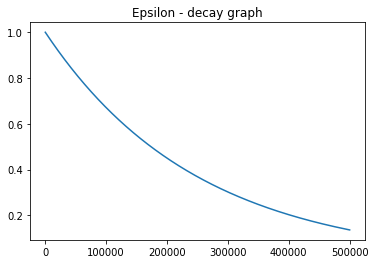

In [59]:
episd = np.arange(0,EPISODES)
epsilon = []
for i in range(0,EPISODES):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*i))

plt.plot(episd, epsilon)
plt.title("Epsilon - decay graph")
plt.show()

### Q-update loop

In [61]:
start_time = time.time()
episode_time= time.time()
agent_won = 0
envn_won = 0
tie_cnt = 0

for episode in range(EPISODES):
    # initializing the object for new episode
    
    env = TicTacToe()
    curr_state = env.state
    isTerminated = False
    add_to_dict(curr_state)
    total_reward = 0

    while not isTerminated:
        current_lookup = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)
        next_state, reward, isTerminated,result = env.step(curr_state, curr_action)

        if isTerminated:
          # Game terminated
            if result == "Agent_won":
                agent_won += 1
            elif result == "Envn_won":
                envn_won += 1
            else :
                tie_cnt += 1
            # update Q table with new reward
            Q_dict[current_lookup][curr_action] += LR*((reward - Q_dict[current_lookup][curr_action]))
        else:
          # Game need to be resumed
            next_lookup = Q_state(next_state)
            add_to_dict(next_state)
            max_next = max(Q_dict[next_lookup],key=Q_dict[next_lookup].get)
            # update Q table 
            Q_dict[current_lookup][curr_action] += \
                LR *((reward + (GAMMA * (Q_dict[next_lookup][max_next]))) -\
                Q_dict[current_lookup][curr_action])
        
        curr_state = next_state
        total_reward += reward
    
    # for debug logs
    if (episode + 1) % chkpt_print == 0:
        print("After %d Episodes:- Agent Won: %.3f%%, Environment Won: %.3f%%, Tie: %.3f%%, Time: %ds"% \
          (episode + 1, agent_won / (episode + 1), envn_won /(episode + 1), tie_cnt / (episode + 1),\
           time.time()-episode_time))
        episode_time = time.time() 
    
    # Save state-action pairs
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()


elapsed_time = time.time() - start_time
save_obj(States_track, 'States_tracked')
save_obj(Q_dict, 'Policy')
print("Total time:- ",elapsed_time)


After 50000 Episodes:- Agent Won: 0.333%, Environment Won: 0.408%, Tie: 0.259%, Time: 82s
After 100000 Episodes:- Agent Won: 0.361%, Environment Won: 0.388%, Tie: 0.251%, Time: 78s
After 150000 Episodes:- Agent Won: 0.395%, Environment Won: 0.365%, Tie: 0.239%, Time: 70s
After 200000 Episodes:- Agent Won: 0.431%, Environment Won: 0.342%, Tie: 0.227%, Time: 66s
After 250000 Episodes:- Agent Won: 0.470%, Environment Won: 0.318%, Tie: 0.212%, Time: 62s
After 300000 Episodes:- Agent Won: 0.506%, Environment Won: 0.295%, Tie: 0.199%, Time: 59s
After 350000 Episodes:- Agent Won: 0.539%, Environment Won: 0.275%, Tie: 0.186%, Time: 59s
After 400000 Episodes:- Agent Won: 0.570%, Environment Won: 0.257%, Tie: 0.173%, Time: 54s
After 450000 Episodes:- Agent Won: 0.599%, Environment Won: 0.240%, Tie: 0.162%, Time: 53s
After 500000 Episodes:- Agent Won: 0.624%, Environment Won: 0.224%, Tie: 0.152%, Time: 51s
Total time:-  639.3307197093964


### Q-dictionary

In [3]:
# to load pickle files
with open('States_tracked.pkl', 'rb') as f:
    States_track = pickle.load(f)

with open('Policy.pkl', 'rb') as f:
    Q_dict = pickle.load(f)

In [4]:
print("Number of enteries in Q table :- %d"%len(Q_dict))

Number of enteries in Q table :- 302429


In [5]:
state = 'x-3-x-x-x-6-x-x-x' 
print("Checking Entries for %s state\n"%state)
Q_dict[state]

Checking Entries for x-3-x-x-x-6-x-x-x state



{(0, 1): -0.019000000000000003,
 (0, 5): -0.0490099501,
 (0, 7): -0.029701,
 (0, 9): -0.029701,
 (2, 1): -0.03940399,
 (2, 5): -0.029701,
 (2, 7): -0.12583090000000002,
 (2, 9): 0,
 (3, 1): -0.0199,
 (3, 5): -0.199,
 (3, 7): -0.21761299,
 (3, 9): 4.637317747928147,
 (4, 1): -0.029701,
 (4, 5): -0.12940399,
 (4, 7): -0.32228249149900007,
 (4, 9): 0.1,
 (6, 1): -0.029701,
 (6, 5): -0.0199,
 (6, 7): -0.01,
 (6, 9): -0.028801,
 (7, 1): -0.0490099501,
 (7, 5): -0.058519850599,
 (7, 7): -0.029701,
 (7, 9): -0.029701,
 (8, 1): -0.0490099501,
 (8, 5): -0.03940399,
 (8, 7): -0.1099,
 (8, 9): 0.1}

In [6]:
next_action = max(Q_dict[state],key=Q_dict[state].get)
print("Best action for state %s is %s" % (state,str(next_action)))
print("Q(s,a) is ",Q_dict[state][next_action])

Best action for state x-3-x-x-x-6-x-x-x is (3, 9)
Q(s,a) is  4.637317747928147


### States tracked for Q-values convergence

<function matplotlib.pyplot.show(close=None, block=None)>

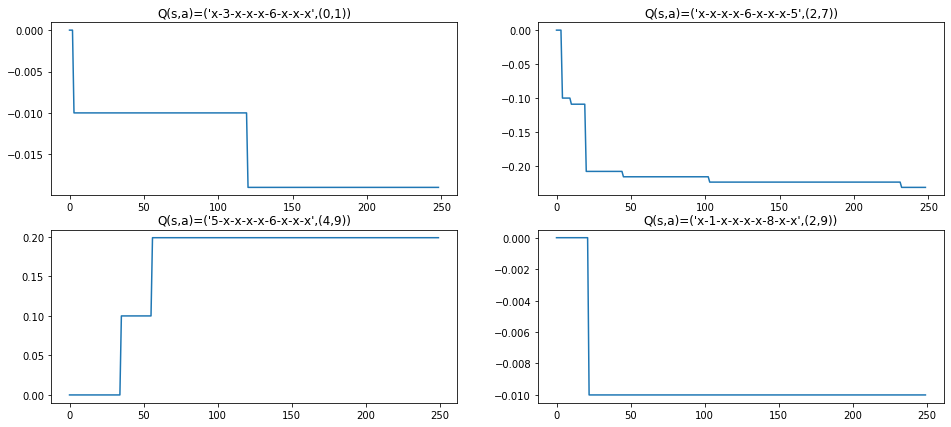

In [7]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-3-x-x-x-6-x-x-x'][(0,1)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-3-x-x-x-6-x-x-x'][(0,1)]))
plt.title("Q(s,a)=('x-3-x-x-x-6-x-x-x',(0,1))")
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-6-x-x-x-5'][(2,7)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-6-x-x-x-5'][(2,7)]))
plt.title("Q(s,a)=('x-x-x-x-6-x-x-x-5',(2,7))")
plt.show

x_axis = np.asarray(range(0, len(States_track['5-x-x-x-x-6-x-x-x'][(4,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['5-x-x-x-x-6-x-x-x'][(4,9)]))
plt.title("Q(s,a)=('5-x-x-x-x-6-x-x-x',(4,9))")
plt.show

x_axis = np.asarray(range(0, len(States_track['x-1-x-x-x-x-8-x-x'][(2,9)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-1-x-x-x-x-8-x-x'][(2,9)]))
plt.title("Q(s,a)=('x-1-x-x-x-x-8-x-x',(2,9))")
plt.show